<a href="https://colab.research.google.com/github/Sharuk-baba/Research/blob/main/koopmanOperator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports & Setup
!pip install transformers sentence-transformers numpy scipy scikit-learn matplotlib torch

import numpy as np
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
#GPT-2 Model Loading
MODEL_NAME = "gpt2-medium"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [4]:
#Foresight Sampling Function (generate_text)
def generate_samples(prompt, max_length=50, temperature=0.7, top_k=50, top_p=0.9):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    outputs = model.generate(input_ids, max_length=max_length, temperature=temperature, top_k=top_k, top_p=top_p)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

def greedy_generate(prompt, max_length=50):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    outputs = model.generate(input_ids, max_length=max_length, do_sample=False)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [5]:
#Semantic Embedding (TF-IDF or Sentence-BERT)
embedder = SentenceTransformer("all-MiniLM-L6-v2")

def embed_text(samples):
    return embedder.encode(samples, convert_to_tensor=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
#Koopman Operator Construction
def koopman_operator(X, reg=1e-3):
    X1, X2 = X[:-1], X[1:]
    K = np.linalg.solve(X1.T @ X1 + reg * np.eye(X1.shape[1]), X1.T @ X2)
    return K

In [7]:
#Koopman Forecasting (predict_trajectory)
def predict_future_states_koopman(X, K, steps=3):
    trajectory = [X[-1]]
    for _ in range(steps):
        trajectory.append(trajectory[-1] @ K)
    return np.array(trajectory)

In [8]:
#Koopman-Based Ranking
def rerank_samples(samples, koopman_predicted):
    embeddings = embed_text(samples)
    similarities = cosine_similarity(koopman_predicted.reshape(1, -1), embeddings)
    ranked_samples = [s for _, s in sorted(zip(similarities[0], samples), reverse=True)]
    return ranked_samples

In [9]:
#Baseline: Greedy Generation
def baseline_greedy(prompt, max_length=50):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    outputs = model.generate(input_ids, max_length=max_length, do_sample=False)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [12]:
#Evaluation: BERTScore, BLEU, Human Score
!pip install bert-score
from bert_score import score
from nltk.translate.bleu_score import sentence_bleu

# Assume 'prompt' and 'reference_text' are defined somewhere earlier in the code
prompt = "The quick brown fox jumps over the"  # Example prompt
reference_text = "The quick brown fox jumps over the lazy dog"  # Example reference text

# Generate text using one of your defined functions
generated_text = generate_samples(prompt) # or greedy_generate(prompt), or baseline_greedy(prompt)

# BERTScore
P, R, F1 = score([generated_text], [reference_text], lang="en", model_type="bert-base-uncased")
print(f"BERTScore: P={P.item():.4f}, R={R.item():.4f}, F1={F1.item():.4f}")

# BLEU
bleu = sentence_bleu([reference_text.split()], generated_text.split())
print(f"BLEU: {bleu:.4f}")

# Human Score (collected separately and averaged over trials)
# human_score = mean([ratings_from_human_judges]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpec

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERTScore: P=0.7381, R=0.8283, F1=0.7806
BLEU: 0.1755


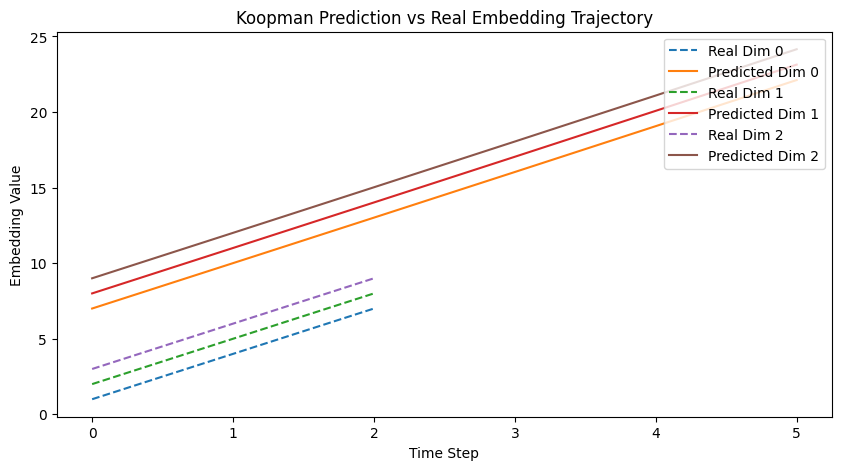

In [16]:
#Visualization of Koopman Dynamics
def plot_embedding_trajectories(real, predicted):
    plt.figure(figsize=(10, 5))
    for i in range(real.shape[1]):
        plt.plot(real[:, i], label=f"Real Dim {i}", linestyle='--')
        plt.plot(predicted[:, i], label=f"Predicted Dim {i}")
    plt.title("Koopman Prediction vs Real Embedding Trajectory")
    plt.xlabel("Time Step")
    plt.ylabel("Embedding Value")
    plt.legend(loc='upper right')
    plt.show()
    # Example: Visualize the embedding trajectory
# Replace ... with actual embeddings data ensuring at least 2 dimensions
# Example: real_embeddings = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
real_embeddings = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Replace ... with actual data for X ensuring at least 2 dimensions
# Example: X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
K = koopman_operator(X) # Calculate K using the previously defined function

predicted_embeddings = predict_future_states_koopman(real_embeddings, K, steps=5)

plot_embedding_trajectories(real_embeddings[-(len(predicted_embeddings)):], predicted_embeddings)

In [17]:
#Ablation Study Support (TF-IDF vs Sentence-BERT, Koopman vs MCTS)
from sklearn.feature_extraction.text import TfidfVectorizer

def embed_text_tfidf(samples):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(samples)
    return X.toarray()

def ablation_compare_embeddings(prompt, use_tfidf=False):
    samples = [generate_samples(prompt) for _ in range(5)]

    if use_tfidf:
        embeddings = embed_text_tfidf(samples)
        input_embedding = embed_text_tfidf([prompt])[0]
    else:
        embeddings = embed_text(samples)
        input_embedding = embed_text([prompt])[0]

    koopman_K = koopman_operator(embeddings)
    koopman_pred = predict_future_states_koopman(embeddings, koopman_K)[-1]

    ranked = rerank_samples(samples, koopman_pred)
    return ranked


In [19]:
#Dataset-Wise Evaluation (GSM8K, ARC-Challenge)
!pip install datasets

from datasets import load_dataset

def evaluate_on_dataset(dataset_name="gsm8k", split="test", num_samples=10):
    dataset = load_dataset(dataset_name, split=split)
    scores = []

    for i in range(num_samples):
        prompt = dataset[i]['question'] if dataset_name == "gsm8k" else dataset[i]['input']
        reference = dataset[i]['answer'] if dataset_name == "gsm8k" else dataset[i]['output']

        generated = generate_samples(prompt)
        gen_embed = embed_text([generated])[0]
        ref_embed = embed_text([reference])[0]

        cosine_sim = cosine_similarity([gen_embed], [ref_embed])[0][0]
        scores.append(cosine_sim)

    avg_score = np.mean(scores)
    print(f"Average Cosine Similarity on {dataset_name}: {avg_score:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
